In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import warnings
import matplotlib
import statistics
from scipy.stats import norm
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
#reading in the data and looking at the shape
iris = pd.read_csv('iris.csv')
print(iris.shape)#new

(150, 5)


<b> Assignment tasks part 1: Number of instances/observations and features/variables </b>

    The Number of instances: 150 #amount of rows
    Number of Features: 5  #amount of columns / fields 

In [3]:
iris.keys() # we can also use iris.columns here having same output 

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

Assignment tasks part 1: Variable types and data types

In [4]:
#data types
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<b> Data type of all the four features/columns is numerical and one categorical type. </b>

    sepal.length variable type: numeric
    sepal.width variable type: numeric
    petal.length variable type: numeric
    petal.width variable type: numeric
    variety variable type: categorical


In [5]:
#First few rows of dataset
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
iris.duplicated().sum()

1

In [7]:
iris[iris.duplicated(keep=False)]

,sepal.length,sepal.width,petal.length,petal.width,variety
101,5.8,2.7,5.1,1.9,Virginica
142,5.8,2.7,5.1,1.9,Virginica


<b> This indicates we shouldn't drop the duplicate, it's likely preferrable to keep a symetric shape. The methodology yields 1 sig fig, so the likelihood of this being a true representation is high <b>

<b>Data Qualtiy Check : Null Values </b>

For null check, either we can use isnull() or isna() or both.

In [8]:
iris.isnull().sum(axis=0)

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In given Data Set, there seems not be any null values present with any of the feature/s. 

<b> Data Set Variety (Class) Classifications : </b>

In [9]:
iris['variety'].value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: variety, dtype: int64

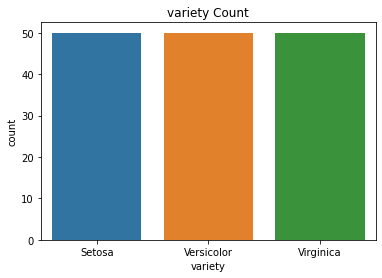

In [10]:
#graphical representation of the above cell
plt.title('variety Count')
sns.countplot(iris['variety']);

Data among three classes: <b>Setosa, Versicolor and Virginica </b> are equally distributed and having almost <b>33.3% </b> share.

<b> Assignment tasks part 1: Descriptive statistics for all variables <b>

In [11]:
print(iris.agg(['min', 'max','nunique']))

         sepal.length  sepal.width  petal.length  petal.width    variety
min               4.3          2.0           1.0          0.1     Setosa
max               7.9          4.4           6.9          2.5  Virginica
nunique          35.0         23.0          43.0         22.0          3


<b>Distinct Values (Number of Levels) Analysis:</b>

    Petal Length having max levels: 43
    Petal Width have least levels: 22
    Petal Length and Petal width are having smaller measurements as expected. 

In [12]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<b>Mean and Median(Q2) </b> is same for almost all features. 
Petal.Length Median is slightly higher than Mean. Checking <b>Skewness and Kurtosis</b> will provide more clarity on data symmetry. 

In [13]:
print('Checking Data Skewness')
print(iris.skew())
print('-----------------------------------------')
print('Checking Data Kurtosis')
print(iris.kurt())

Checking Data Skewness
sepal.length    0.314911
sepal.width     0.318966
petal.length   -0.274884
petal.width    -0.102967
dtype: float64
-----------------------------------------
Checking Data Kurtosis
sepal.length   -0.552064
sepal.width     0.228249
petal.length   -1.402103
petal.width    -1.340604
dtype: float64


<h3> Skewness and Kurtosis Analysis: </h3>

    Sepal Length and Sepal Width are positively skewed.

    Petal Length and Petal width are negatively skewed. 
    
    From above analysis we have found that: for Petal.Length Median > Mean, confirmed by Negative Skew value. Petal Width           having same distribution. 

    Petal Length is having max. symmetry among these features, followed by Petal Width. 

<h3> Analyzing Frequency Distribution for Individual Features</h3>

In [14]:
#additional descriptive statistics "Sepal"
agg1 = iris.groupby(['variety'])['sepal.length', 'sepal.width'].agg(['min', 'max','mean','median','skew','nunique'])
agg1

sepal.length                                      sepal.width       \
                    min  max   mean median      skew nunique         min  max   
variety                                                                         
Setosa              4.3  5.8  5.006    5.0  0.120087      15         2.3  4.4   
Versicolor          4.9  7.0  5.936    5.9  0.105378      21         2.0  3.4   
Virginica           4.9  7.9  6.588    6.5  0.118015      21         2.2  3.8   

                                            
             mean median      skew nunique  
variety                                     
Setosa      3.428    3.4  0.041167      16  
Versicolor  2.770    2.8 -0.362845      14  
Virginica   2.974    3.0  0.365949      13

In [15]:
#Additional descriptive stats "petal"
agg2 = iris.groupby(['variety'])['petal.length', 'petal.width'].agg(['min', 'max','mean','median','skew','nunique'])
agg2

petal.length                                      petal.width       \
                    min  max   mean median      skew nunique         min  max   
variety                                                                         
Setosa              1.0  1.9  1.462   1.50  0.106394       9         0.1  0.6   
Versicolor          3.0  5.1  4.260   4.35 -0.606508      19         1.0  1.8   
Virginica           4.5  6.9  5.552   5.55  0.549445      20         1.4  2.5   

                                            
             mean median      skew nunique  
variety                                     
Setosa      0.246    0.2  1.253861       6  
Versicolor  1.326    1.3 -0.031180       9  
Virginica   2.026    2.0 -0.129477      12

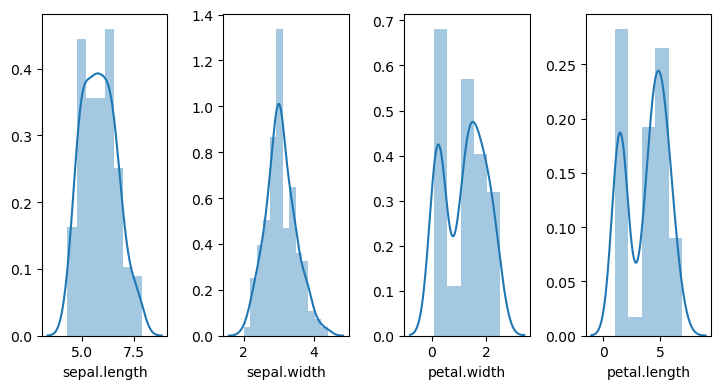

In [16]:
#Graphical representation of the numeric features of the dataset
cols = ['sepal.length', 'sepal.width',  'petal.width', 'petal.length']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,11,i)
    sns.distplot(iris[col])
    i = i+1
plt.tight_layout()
plt.show()

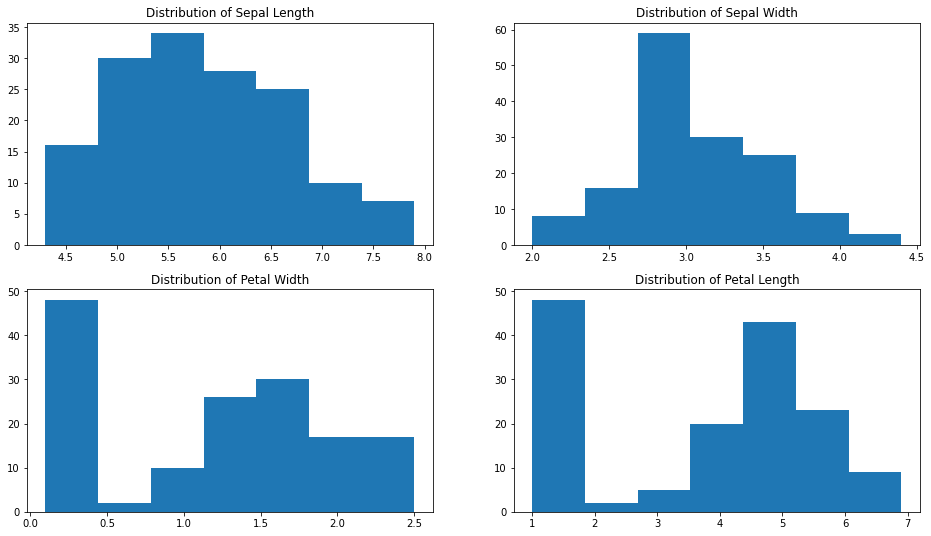

In [17]:
#Histograms
fig, axes = plt.subplots(2, 2, figsize=(16,9))

axes[0,0].set_title("Distribution of Sepal Length")
axes[0,0].hist(iris['sepal.length'], bins=7);

axes[0,1].set_title("Distribution of Sepal Width")
axes[0,1].hist(iris['sepal.width'], bins=7);

axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(iris['petal.width'], bins=7);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(iris['petal.length'], bins=7);

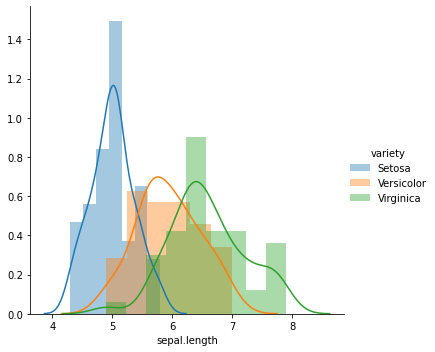

In [18]:
#Seperated by variety
sns.FacetGrid(iris,hue="variety",height=5).map(sns.distplot,"sepal.length").add_legend();
plt.show();

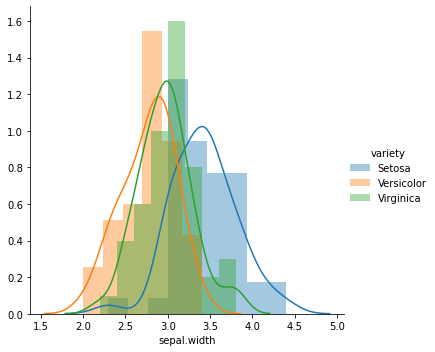

In [19]:
sns.FacetGrid(iris,hue="variety",height=5).map(sns.distplot,"sepal.width").add_legend();
plt.show();

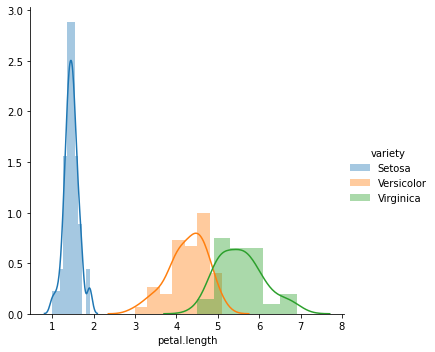

In [20]:
sns.FacetGrid(iris,hue="variety",height=5).map(sns.distplot,"petal.length").add_legend();
plt.show()

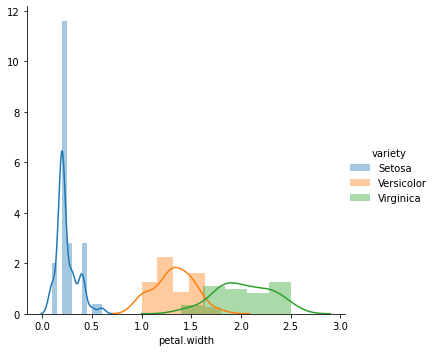

In [21]:
sns.FacetGrid(iris,hue="variety",height=5).map(sns.distplot,"petal.width").add_legend();
plt.show()

<b>Frequency Distribution Analysis:</b>

    Petal.Length having very less overlapping data distributions and hence a good candidate to use as data distinguish-er.

    Petal.Width also having very less overlapping data distributions and this is also a good candidate to use as data        
    distinguish-er.
    
    Sepal.Length having huge overlapping data distributions.
    
    Sepal.Width also having huge overlapping data distributions.

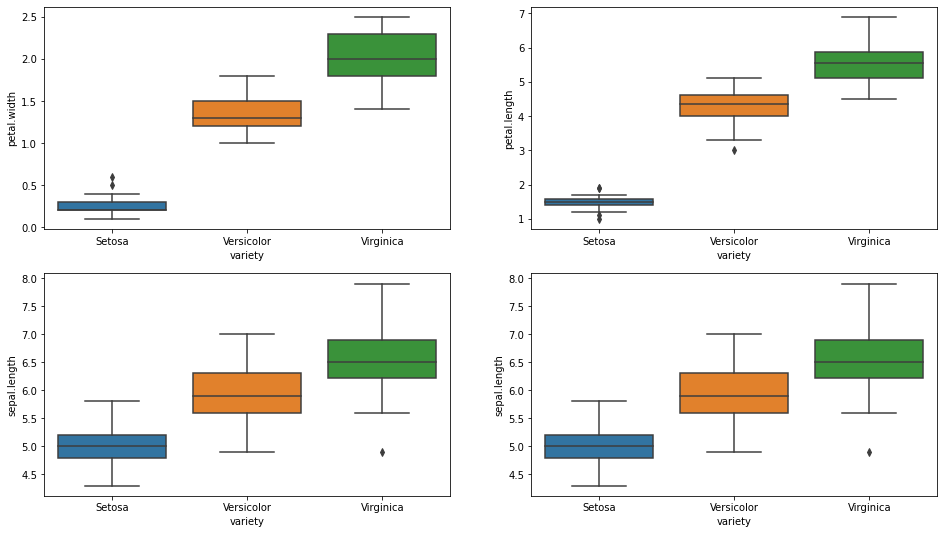

In [22]:
#Box plots
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="petal.width", x= "variety", data=iris,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal.length", x= "variety", data=iris,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal.length", x= "variety", data=iris,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal.length", x= "variety", data=iris,  orient='v' , ax=axes[1, 1])
plt.show()

<b>Box Plot also showing measurment with Petal Length and Petal Width are less overlapping </b>

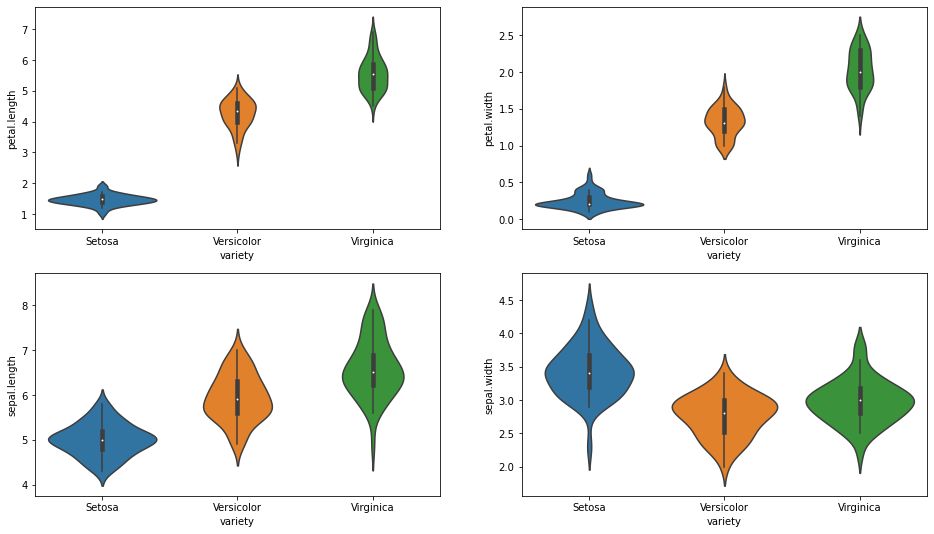

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))

sns.violinplot(y="petal.length", x= "variety", data=iris,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="petal.width", x= "variety", data=iris,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="sepal.length", x= "variety", data=iris,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="sepal.width", x= "variety", data=iris,  orient='v' , ax=axes[1, 1])

plt.show()

In [24]:
iris_setosa=iris.loc[iris["variety"]=="Setosa"]
print('Sepal.Length Unique Count '+ str(iris_setosa['sepal.length'].nunique()) + ': Values:'+ str(np.sort(iris_setosa['sepal.length'].unique())));

print('Sepal.Width Unique Count '+ str(iris_setosa['sepal.width'].nunique()) + ': Values:'+ str(np.sort(iris_setosa['sepal.width'].unique())));


Sepal.Length Unique Count 15: Values:[4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.7 5.8]
Sepal.Width Unique Count 16: Values:[2.3 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.4]


<b> Violin Plot Analysis: </b>

Petal Length & Width: 

    Setosa < Vesricolor < Virginica
    
Examined Setosa Sepal.Length to understand reason for high distribution around median value 5.0 (bottom left pic):

    Sepal.Length Unique Count 15: Values:[4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.7 5.8]

    We can see reason behind Iris Setosa has highest density at 5.0 cm ( sepal length feature).

Also, checking Sepal.Width for high values for Setosa (bottom right pic):

    Sepal.Width Unique Count 16: Values:[2.3 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.4
    
    we have high values for Iris Setosa wrt Sepal Width and this is the reason for violin plot showing high features vs.           Versicolor and Virginica classes.


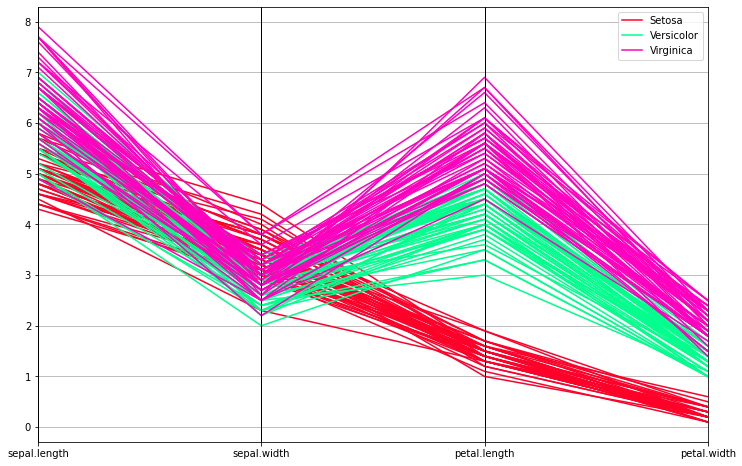

In [25]:
plt.figure(figsize = (12, 8));
parallel_coordinates (iris,"variety",colormap =  "gist_rainbow" );

<b>Parallel_Coordinates</b> shows a very clear picture of data distrubution across Setosa, Versicolor and Virginica wrt to these 4 features. 
This makes easier to understand categorically distribution of data.

<h2> Bi-Variate Analysis of Features wrt Classes </h2>

Assignment tasks part 1: Correlations among numeric variables

In [26]:
corr = iris.corr(method="pearson")
display(corr)

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


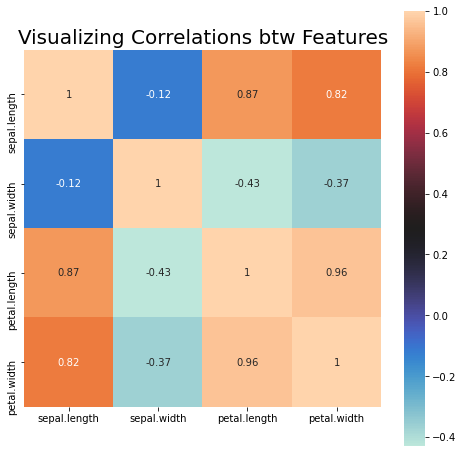

In [27]:
plt.figure(figsize = (8, 8))
sns.heatmap(iris.corr(), cmap = 'icefire', square = True, annot = True)
plt.title("Visualizing Correlations btw Features", size = 20)
plt.show()

Petal.Length & Petal.Width is showing strong <b>co-relation of 0.96</b>. 

We can take this finding futher to create classification rules/models to predict class for new sample. 

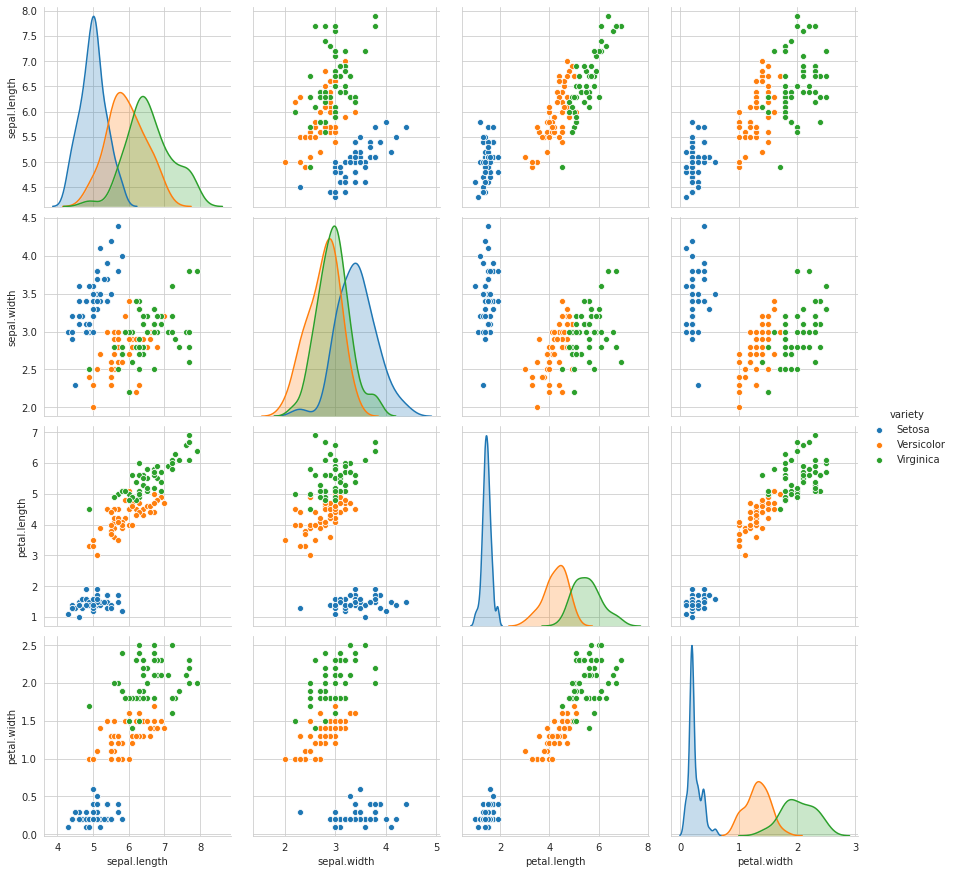

In [28]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="variety",size=3);
plt.show()

<b> Assignment tasks part 1: Scatter plot for Petal width vs. Petal Length <b>

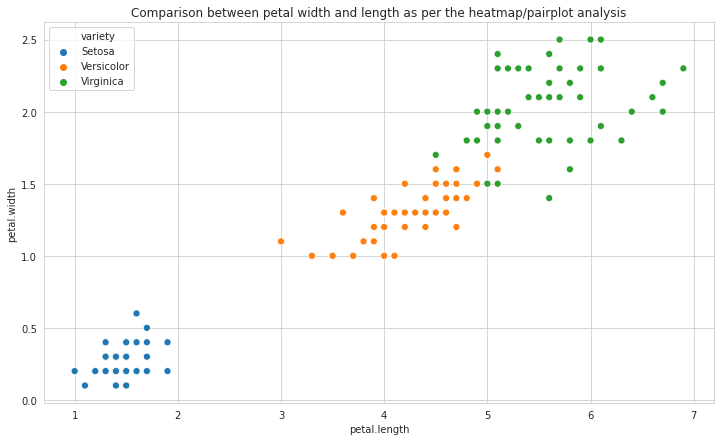

In [29]:
plt.figure(figsize=(12,7))
plt.title('Comparison between petal width and length as per the heatmap/pairplot analysis')
sns.scatterplot(iris['petal.length'], iris['petal.width'], hue = iris['variety'], s= 50);

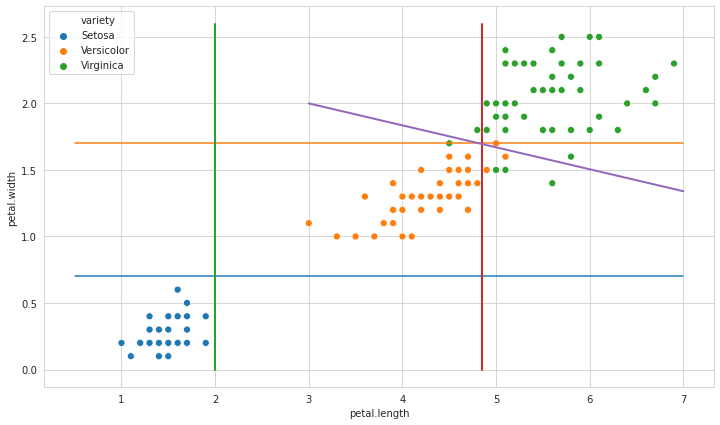

In [30]:
plt.figure(figsize=(12,7))

sns.scatterplot(iris['petal.length'], iris['petal.width'], hue = iris['variety'], s= 50);

sns.lineplot(x= [.5,7] , y = [.7,.7])
sns.lineplot(x= [.5,7] , y = [1.7,1.7])

sns.lineplot(x= [2,2] , y = [0,2.6], estimator=None, linewidth=2)
sns.lineplot(x= [4.85,4.85] , y = [0,2.6], estimator=None, linewidth=2)

sns.lineplot(x= [3,7] , y = [2,1.34], estimator=None, linewidth=2)

plt.show()

<h3> Final Conclusion :: Classification Rule based on above observations </h3>

<b><u>Sentosa:</u></b> If Petal.Length &le; 2 (irrespective of Petal.Width as no outliers from other classes seen in our analysis)

<b><u>Likely Versicolor:</u></b> If  2 &le; Petal.Length &le; 4.8 
                                    && 
                                     0.8 &le; Petal.Width &le; 1.7
               
<b><u>Likely Virginica:</u></b> If Petal.Length &gt; 4.8 
                                &&
                                Petal.Width &gt; 1.7

<b> Assignment tasks part 1: Multi-dimensional plot depicting target feature as the color (3rd) dimension <b>

Target feature for color: Variety

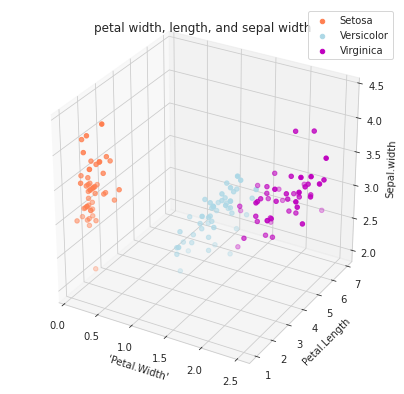

In [31]:
#Z axis will be sepal width
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
#Setosa
x=iris[iris['variety']=='Setosa']['petal.width']
y=iris[iris['variety']=='Setosa']['petal.length']
z=iris[iris['variety']=='Setosa']["sepal.width"]
ax.scatter(x, y, z, c='coral',label='Setosa')
#Versicolor
x=iris[iris['variety']=='Versicolor']['petal.width']
y=iris[iris['variety']=='Versicolor']['petal.length']
z=iris[iris['variety']=='Versicolor']["sepal.width"]
ax.scatter(x, y, z, c='lightblue', label='Versicolor')

#Virginica
x=iris[iris['variety']=='Virginica']['petal.width']
y=iris[iris['variety']=='Virginica']['petal.length']
z=iris[iris['variety']=='Virginica']["sepal.width"]
ax.scatter(x, y, z, c='m', label='Virginica')

ax.set_title("petal width, length, and sepal width")
ax.set_xlabel("'Petal.Width'")
ax.set_ylabel("Petal.Length")
ax.set_zlabel("Sepal.width")
plt.legend()
plt.show()

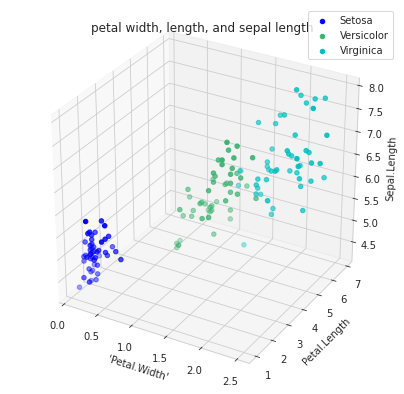

In [32]:
#Z axis will be sepal length
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
#setosa
x=iris[iris['variety']=='Setosa']['petal.width']
y=iris[iris['variety']=='Setosa']['petal.length']
z=iris[iris['variety']=='Setosa']["sepal.length"]
ax.scatter(x, y, z, c='b', label='Setosa')
#Versicolor
x=iris[iris['variety']=='Versicolor']['petal.width']
y=iris[iris['variety']=='Versicolor']['petal.length']
z=iris[iris['variety']=='Versicolor']["sepal.length"]
ax.scatter(x, y, z, c='mediumseagreen', label='Versicolor')

#Virginica
x=iris[iris['variety']=='Virginica']['petal.width']
y=iris[iris['variety']=='Virginica']['petal.length']
z=iris[iris['variety']=='Virginica']["sepal.length"]
ax.scatter(x, y, z, c='c', label='Virginica')

ax.set_title("petal width, length, and sepal length")
ax.set_xlabel("'Petal.Width'")
ax.set_ylabel("Petal.Length")
ax.set_zlabel("Sepal.Length")
plt.legend()
plt.show()

<h2> Part 2: Additional Analysis: </h2>

Note additional visual representations provided above

<b> Error analysis <b>

In [33]:
#Standard error of the mean
from scipy.stats import sem
numericCols = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
standarderror = []
for i in numericCols:
    standarderror.append(sem(iris[i]))
data = {'Variable': numericCols, 'Standard Error of the mean': standarderror}
errorDF = pd.DataFrame(data)
errorDF

,Variable,Standard Error of the mean
0,sepal.length,0.067611
1,sepal.width,0.035588
2,petal.length,0.144136
3,petal.width,0.062236
